In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

# Lab cleaning numerical data

In [69]:
# import data
data = pd.read_csv('C:/Users/Anne_2/Documents/Ironhack/Python CustomerAnalysis/2/lab-cleaning-numerical-data-master/lab-cleaning-numerical-data-master/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [70]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
data.shape

(9134, 24)

In [71]:
#Standardize header names:
data.columns=[i.lower().replace(' ', '_') for i in data.columns]

In [72]:
# Change effective to date column to datetime format
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data['effective_to_date'].head()

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

In [8]:
# check for duplicates
data.customer.duplicated().sum()

0

In [73]:
# Define a function that differentiates between continuous and discrete variables.
def variable_cat(data):
    for column in data.columns:
        if data[column].dtype == 'float64' or data[column].dtype == 'int64':
            if data[column].nunique() > 100:
                data[column] = data[column].astype('float64')
            else:
                data[column] = data[column].astype('int64')
    return data.info()

In [74]:
# calling the function - changed income and monthly_premium_auto into float64
variable_cat(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   float64       
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [75]:
# Store continuous data into a continuous variable and do the same for discrete and categorical
continuous = data.select_dtypes('float64')
discrete = data.select_dtypes('int64')
categorical = data.select_dtypes('object').drop('customer', axis = 1) # categorical data, dropping customer id

In [12]:
# For the categorical data, check if there is some kind of text in a variable so we would need to clean it.
for i in categorical.columns:
    print(data[i].value_counts())

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595


### --> no cleaning necessary, all categories are okay

In [20]:
# function for splitting the data by data type (instead of using select_dtypes)
def split_data(df):
    disc = []
    cont = []
    cat = []
    for column in df:
        if df[column].dtype == 'int64':
            disc.append(column)
        elif df[column].dtype == 'float64':
            cont.append(column)
        else:
            cat.append(column)
    return df[disc], df[cont], df[cat]

In [21]:
discrete, continuous, categorical = split_data(data)

In [22]:
discrete

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


In [23]:
continuous

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274.0,69.0,384.811147
1,6979.535903,0.0,94.0,1131.464935
2,12887.431650,48767.0,108.0,566.472247
3,7645.861827,0.0,106.0,529.881344
4,2813.692575,43836.0,73.0,138.130879
...,...,...,...,...
9129,23405.987980,71941.0,73.0,198.234764
9130,3096.511217,21604.0,79.0,379.200000
9131,8163.890428,0.0,85.0,790.784983
9132,7524.442436,21941.0,96.0,691.200000


In [24]:
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [25]:
# dropping the customer id (again)
categorical = categorical.drop('customer', axis = 1)

# Lab cleaning categorical data

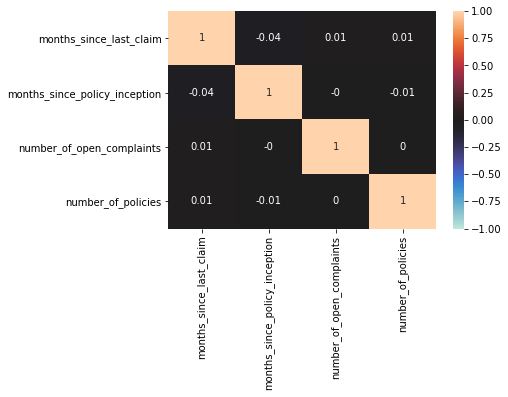

In [26]:
# Plot a correlation matrix, what can you see?

# correlation matrix for discrete data
ax = sns.heatmap(round(discrete.corr(), 2), vmin=-1, vmax=1, center = 0, annot = True, annot_kws = {'size': 10})
plt.show()

### --> no relevant correlation between discrete features

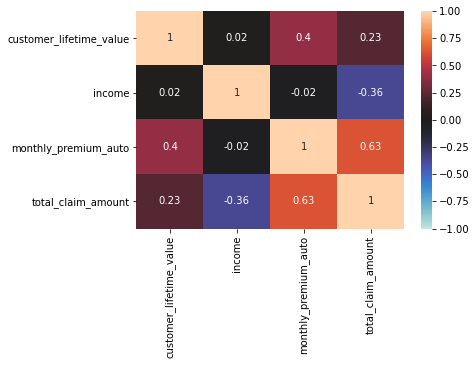

In [30]:
# correlation between continuous features
ax = sns.heatmap(round(continuous.corr(), 2), vmin= -1, vmax = 1, center = 0, annot = True, annot_kws = {'size':10})
plt.show()

### --> total_claim_amount is strongly correlated to monthly_auto_premium, and correlated negatively to income and moderate positively to customer_lifetime_value. Furthermore customer_lifetime_value and monthly_premium_auto are positively correlated.

In [45]:
# Create a function to plot every discrete variable.
def plot_discrete(df):
    for column in df:
        plt.hist(df[column], bins = df[column].nunique())
        plt.title(column)
        plt.ylabel('frequency')
        plt.show()

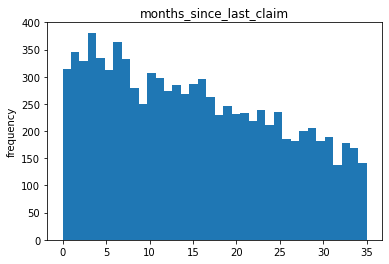

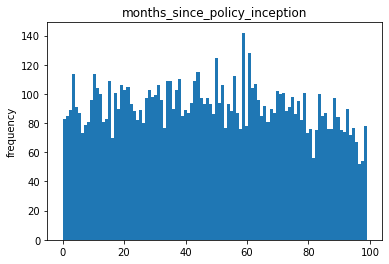

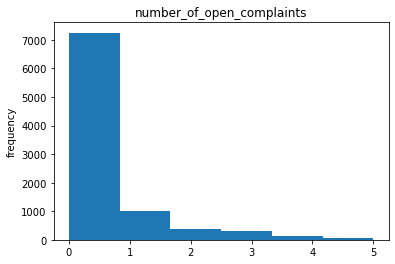

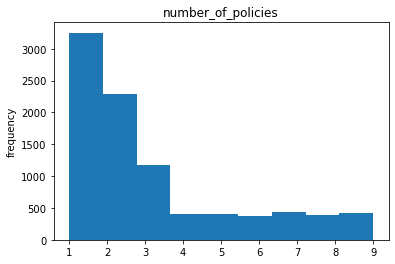

In [46]:
# calling the function
plot_discrete(discrete)

In [98]:
# Create a function to plot every discrete variable as subplots
def subplots_frequency(data):
    
    fig, axs = plt.subplots(math.ceil(len(data.columns)/2), 2)
    fig.tight_layout()
    a = 0
    b = 0

    for column in data:
        axs[a, b].hist(data[column], bins = data[column].nunique())
        axs[a, b].set_title(column)
        axs[a, b].set_ylabel('frequency')
        if b == 0:
            b += 1
        else:
            a += 1
            b = 0

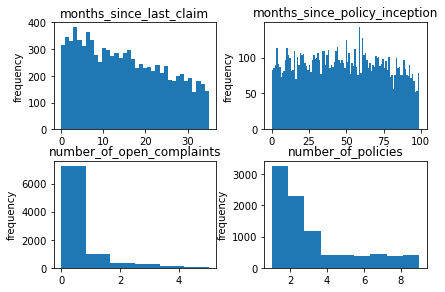

In [99]:
# call the subplot function for discrete data
subplots_frequency(discrete)

In [133]:
# Do the same with continuous variables
def subplots_kdeplot(data):
    
    fig, axs = plt.subplots(math.ceil(len(data.columns)/2), 2, figsize=(8,4))
    fig.tight_layout()
    a = 0
    b = 0

    for column in data:
        sns.kdeplot(x = data[column], ax =  axs[a, b])
        if b == 0:
            b += 1
        else:
            a += 1
            b = 0   

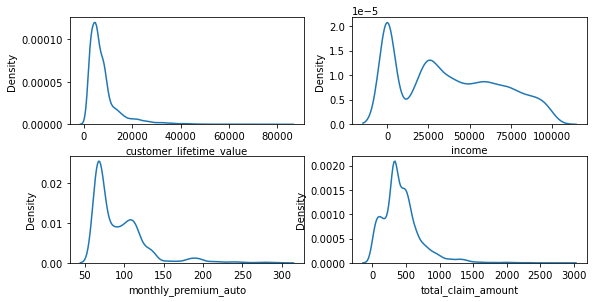

In [134]:
# call the function for continuous data
subplots_kdeplot(continuous)

#### --> none of the features are normally distributed, except for months_since_policy_inception, all distributions are left skewed.

In [128]:
# Looking for outliers (using boxplots)

def subplots_boxplot(data):
    
    fig, axs = plt.subplots(math.ceil(len(data.columns)/2), 2, figsize=(8,4))
    fig.tight_layout()
    a = 0
    b = 0

    for column in data:
        sns.boxplot(x = data[column], ax =  axs[a, b])
        if b == 0:
            b += 1
        else:
            a += 1
            b = 0   

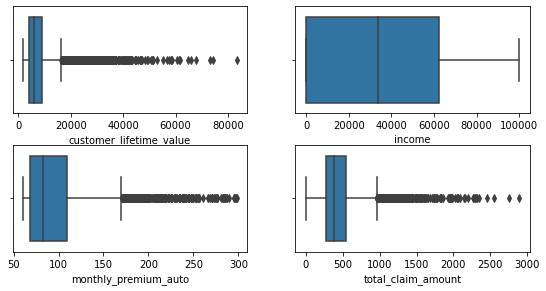

In [129]:
# call the function for continuous data
subplots_boxplot(continuous)

In [76]:
# remove outliers from continuous data (clv, monthly premium and claim amount)
def remove_outliers(data, column):
    print('Before removal: ', data.shape)
    iqr = np.percentile(data[column], 75) - np.percentile(data[column], 25)
    lower_boundary = np.percentile(data[column], 25) - iqr*1.5
    upper_boundary = np.percentile(data[column], 75) + iqr*1.5
    data = data[(data[column]>lower_boundary)&(data[column]<upper_boundary)]
    print('After removal: ', data.shape)
    return data.reset_index(drop=True)

In [77]:
# 1. removing outliers from customer_lifetime_value
data = remove_outliers(data, 'customer_lifetime_value')

Before removal:  (9134, 24)
After removal:  (8317, 24)


In [79]:
# 2. removing outliers from monthly_premium_auto
data = remove_outliers(data, 'monthly_premium_auto')

Before removal:  (8317, 24)
After removal:  (8016, 24)


In [81]:
# 3. removing outliers from total_claim_amount
data = remove_outliers(data, 'total_claim_amount')

Before removal:  (8016, 24)
After removal:  (7789, 24)


## Instructions 8 to 12 from lab were already done in the previous lab